# Importing Library:

In [250]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [251]:
# Importing Flight Prediction dataset Excel file using pandas
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [252]:
# total no of rows and columns
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 7043
No of Columns: 21


In [253]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [254]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

7043 Rows and 21 Columns in this Telecom Dataset.

Target Variable 'Churn' with object datatype.


In [255]:
df.drop(['customerID'],axis=1,inplace=True)

In [256]:
df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [257]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

### Statistical Analysis

In [258]:
# This will check the duplicate data for all columns.
df.duplicated().sum()  

22

In [259]:
df.drop_duplicates(keep='last',inplace= True)

In [260]:
# Checking for na ,blank space.
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [261]:
df['TotalCharges'].isin([' ']).sum()

11

In [262]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [263]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

### Missing value check

In [264]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

impute missing value in TotalCharges either with mean and media

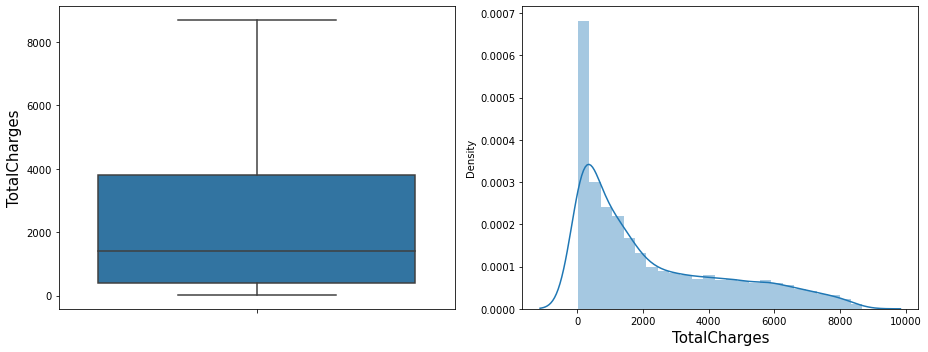

In [265]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df)
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'])
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [266]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.353388017122
Median of TotalCharges: 1403.875


Imputation of Missing value in TotalCharges with Mean

In [267]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

### Missing value check

<AxesSubplot:>

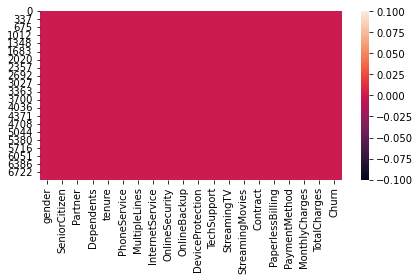

In [268]:
# checking the null values with heatmap
sns.heatmap(df.isnull())

No Missing Value and duplicate entry is Present.

In [269]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.353388,2265.044136,18.80,411.15,1410.25,3801.7,8684.80


In [270]:
df[Categorical].describe().T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


In [271]:
# Unique value counts of ',i, 'Enlisted as Below Table :
for i in Categorical:
    print(df[i].value_counts())
    print("-"*60)

Male      3541
Female    3480
Name: gender, dtype: int64
------------------------------------------------------------
No     3619
Yes    3402
Name: Partner, dtype: int64
------------------------------------------------------------
No     4911
Yes    2110
Name: Dependents, dtype: int64
------------------------------------------------------------
Yes    6339
No      682
Name: PhoneService, dtype: int64
------------------------------------------------------------
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------------------------------------
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
------------------------------------------------------------
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
------------------------------------------------------------
No                     3080


# Exploratory Data Analysis

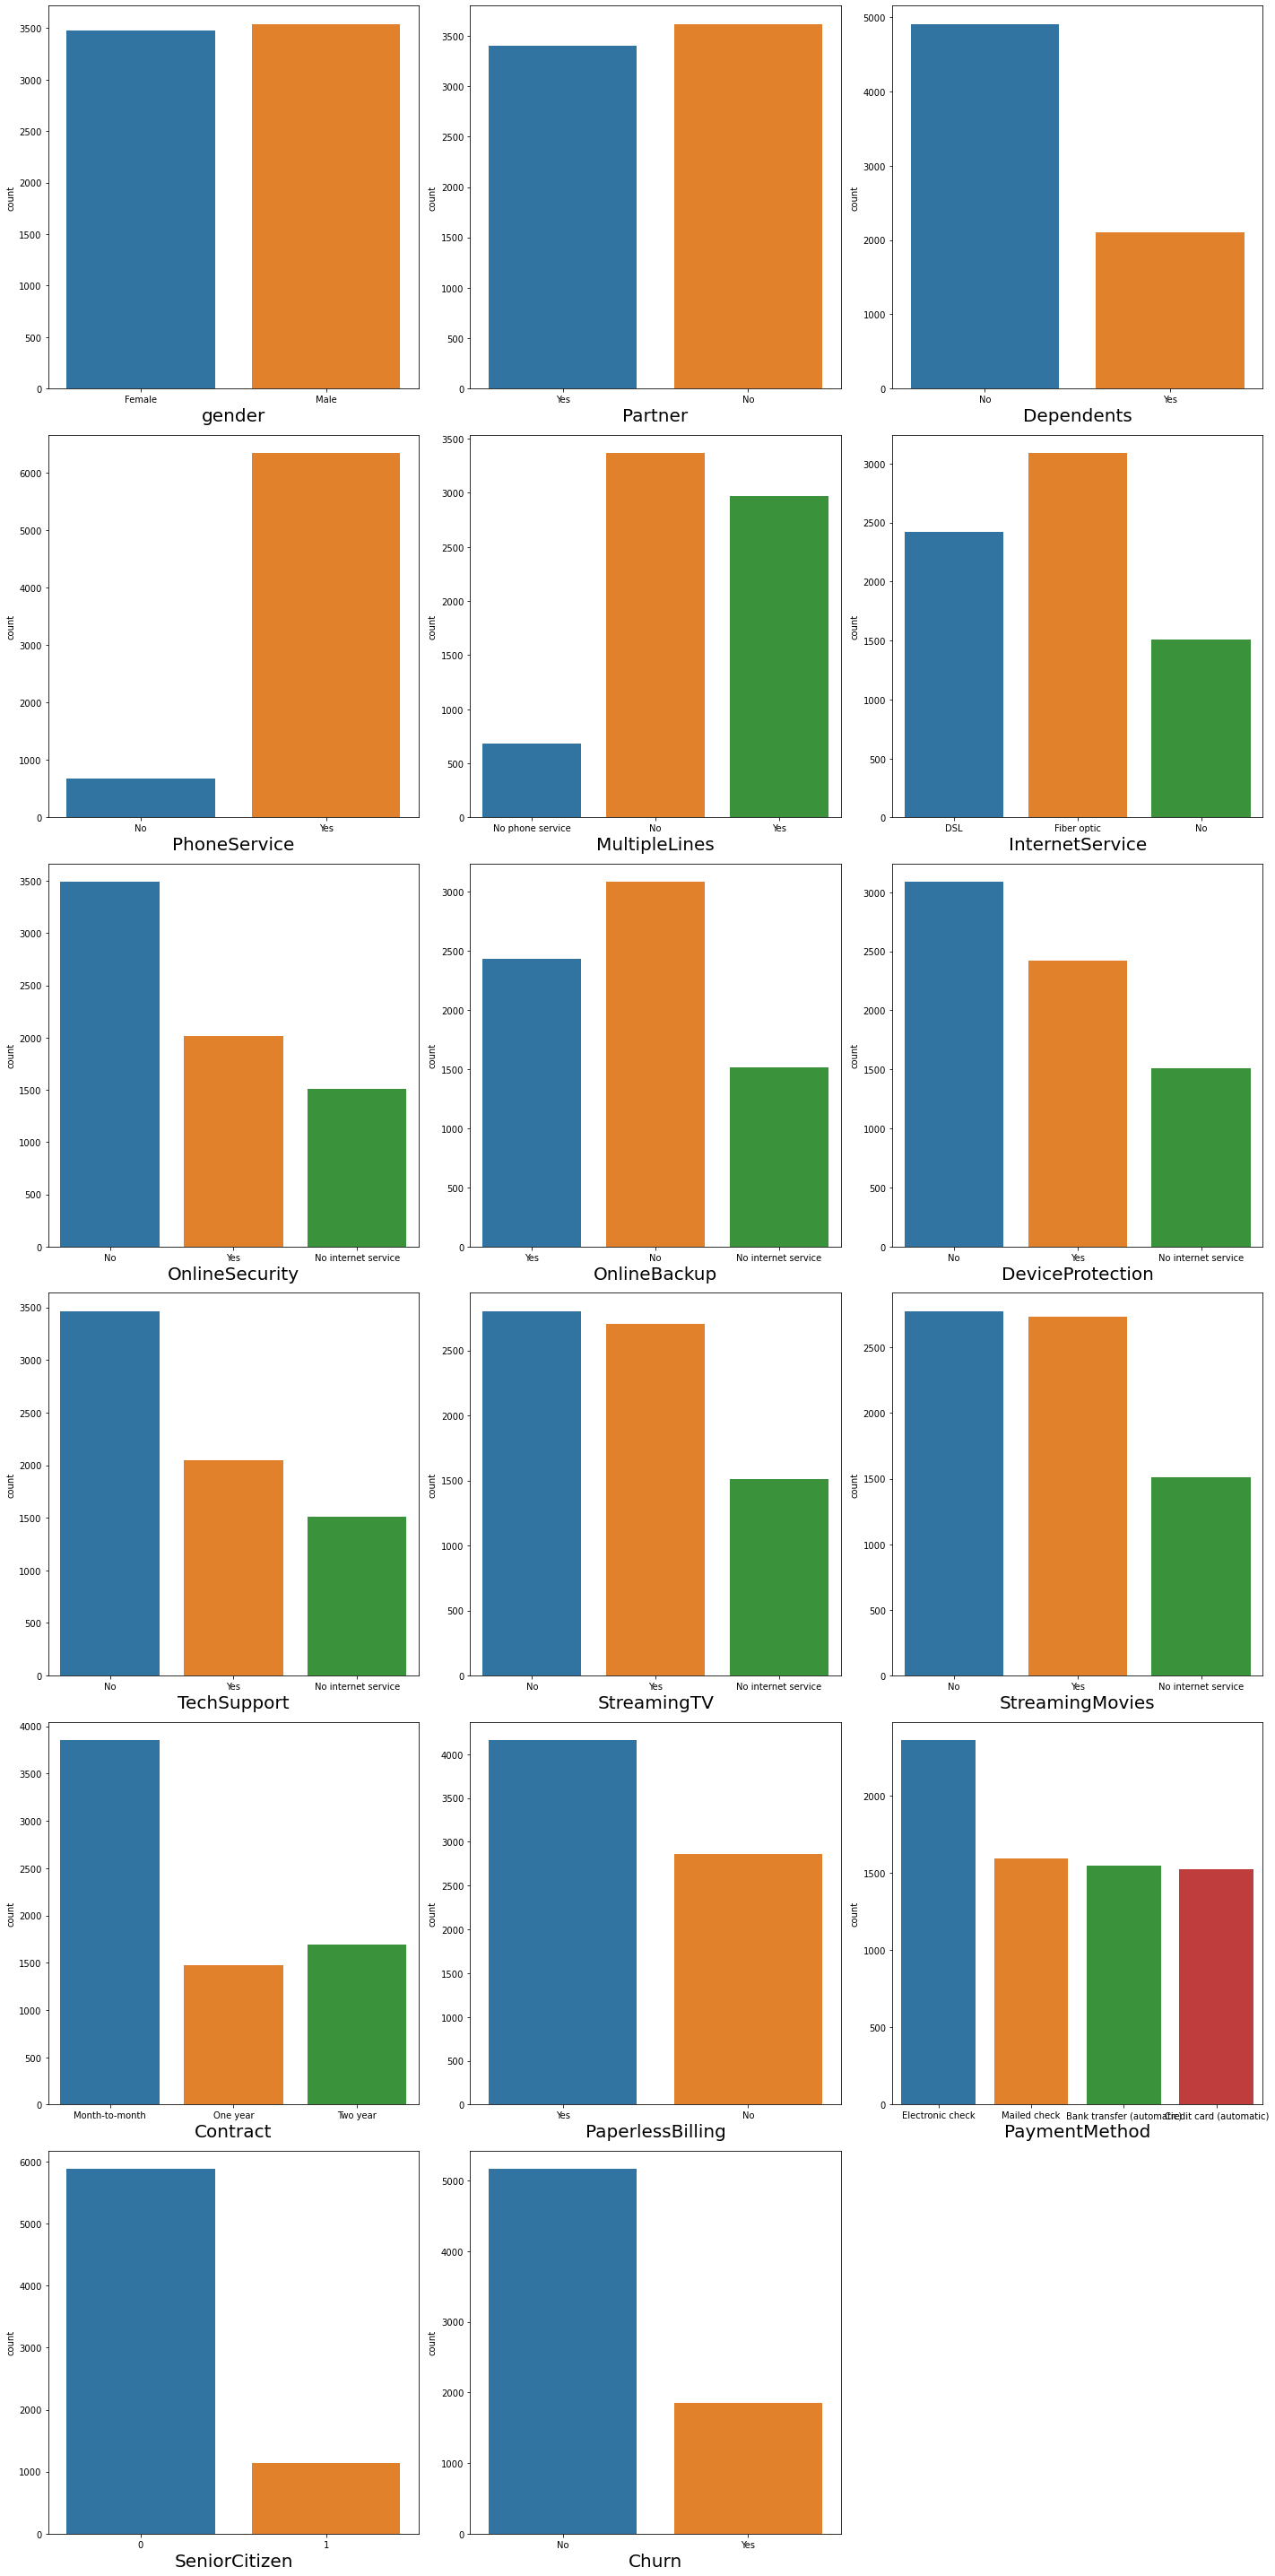

In [272]:
plt.figure(figsize=(20,40))
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

#### Target Variable Churn

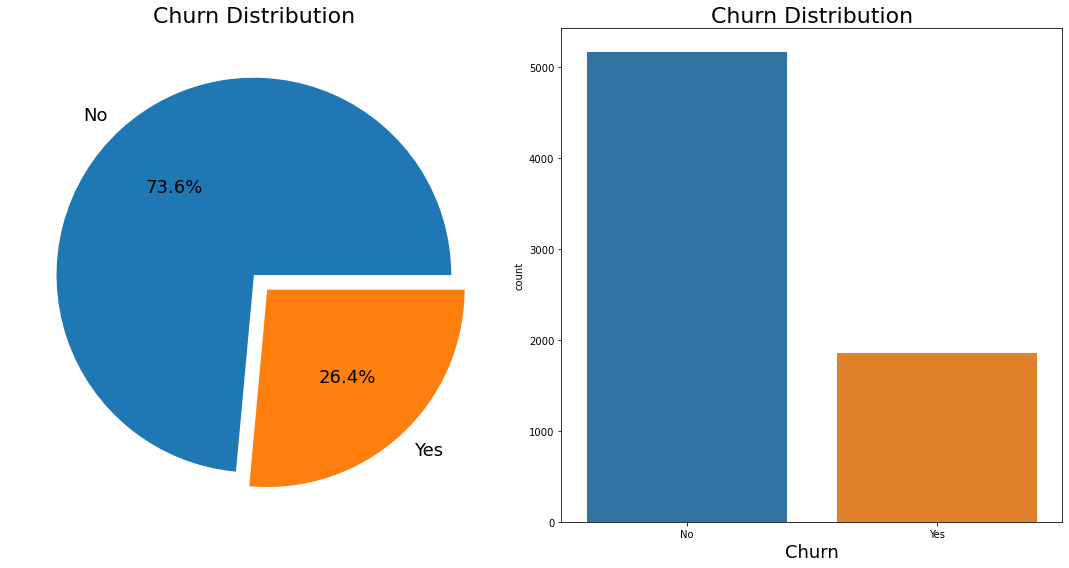

In [273]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',fontsize = 18, ax=ax[0])
ax[0].set_title('Churn Distribution', fontsize=22)
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22)
ax[1].set_xlabel("Churn",fontsize=18)
plt.show()

26.4 % Customer choose to churn service in last month. Which is quite high number

#### Gender vs Churn 

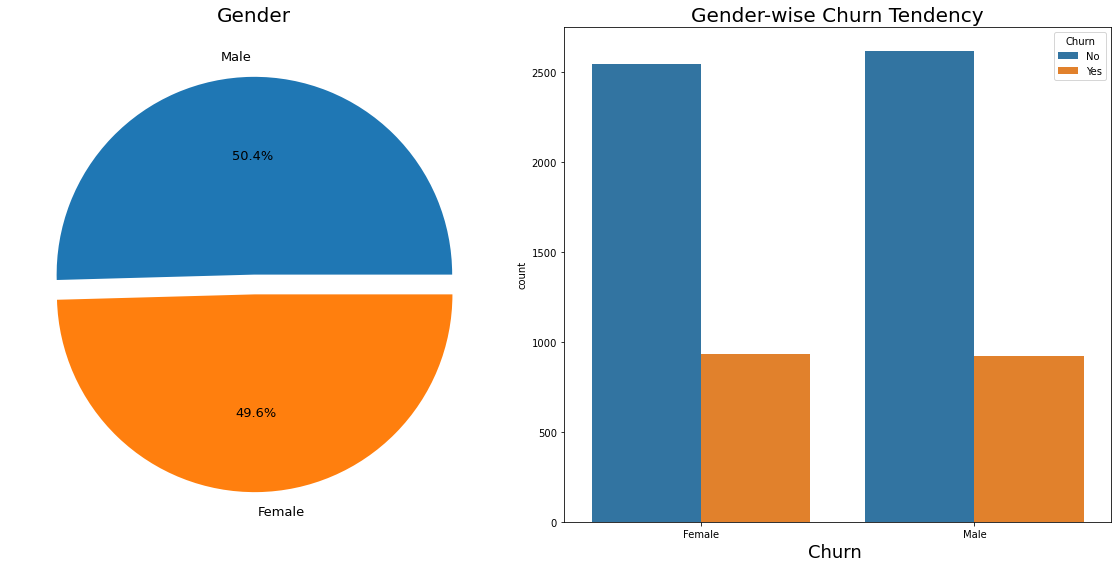

In [274]:
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',fontsize = 13, ax=ax[0])
ax[0].set_title('Gender', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20)
ax[1].set_xlabel("Churn ",fontsize=18)
plt.tight_layout()
plt.show()

In [275]:
pd.crosstab(df['gender'],df["Churn"],margins=True)

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


Data contain both gender almost in same proportion with minor difference.

Both gender have tendency of attrition in same percentage.

#### Senior Citizen vs Gender Wise Churn

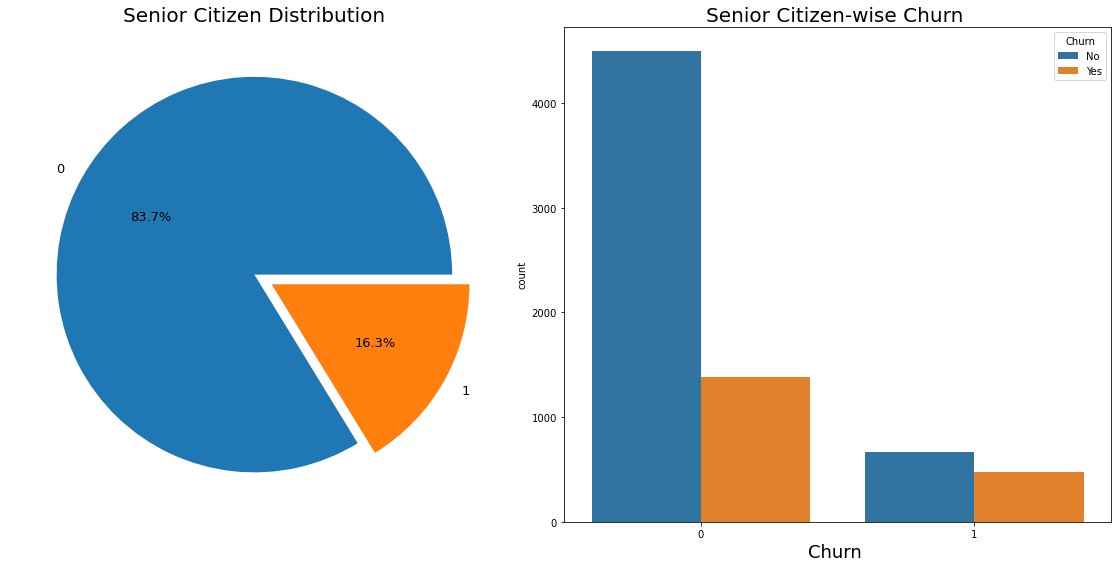

In [276]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',fontsize = 13, ax=ax[0])
ax[0].set_title('Senior Citizen Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn ',fontsize=20)
ax[1].set_xlabel("Churn ",fontsize=18)
plt.tight_layout()
plt.show()

only 16.3 % of the customers who are senior citizens. 

In [277]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True)

Churn                   No   Yes   All
gender SeniorCitizen                  
Female 0              2218   695  2913
       1               328   239   567
Male   0              2280   687  2967
       1               338   236   574
All                   5164  1857  7021

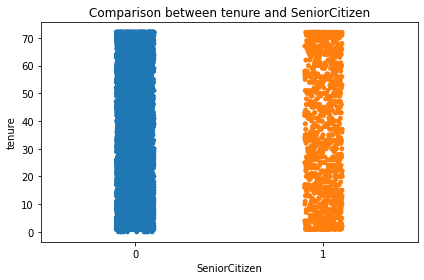

In [278]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.

There is no significant relation between Senior Citizen and Tenure.

#### Partner and Dependents on Churn

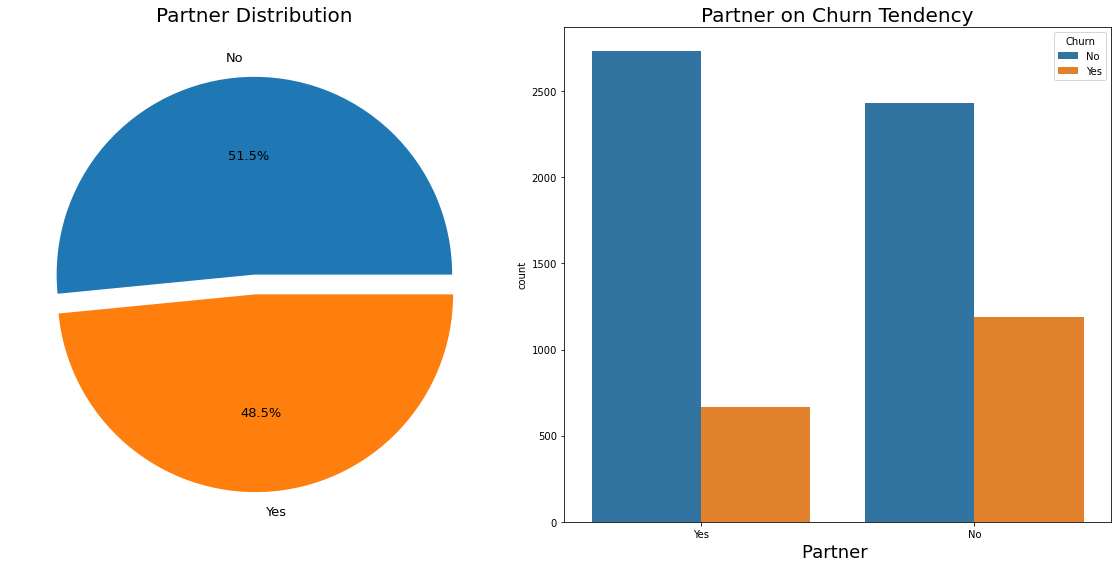

In [279]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',fontsize = 13, ax=ax[0])
ax[0].set_title('Partner Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Partner on Churn Tendency',fontsize=20)
ax[1].set_xlabel("Partner ",fontsize=18)
plt.tight_layout()
plt.show()

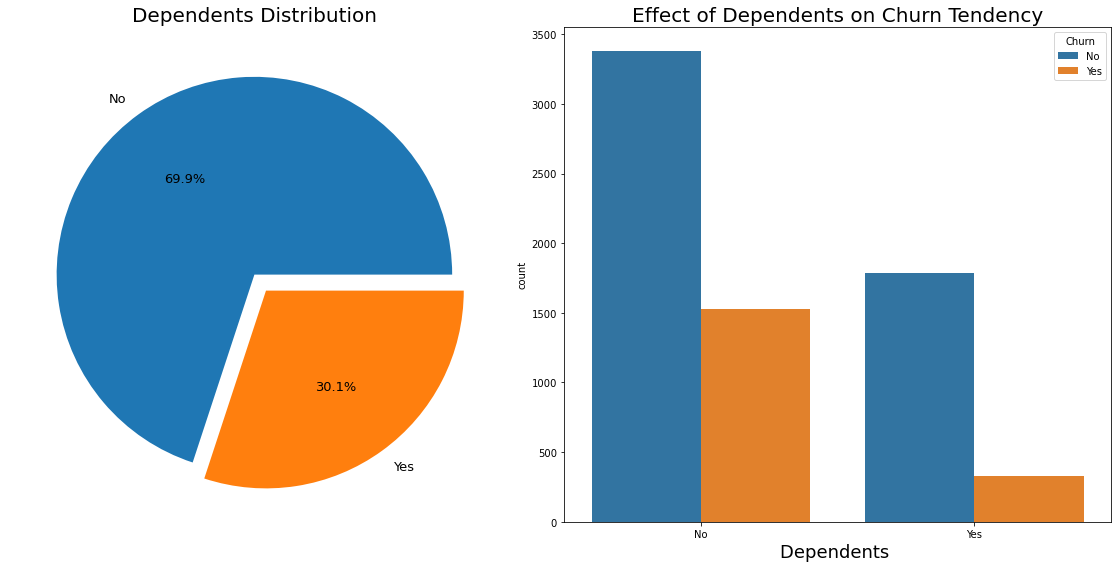

In [280]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',fontsize = 13, ax=ax[0])
ax[0].set_title('Dependents Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20)
ax[1].set_xlabel("Dependents ",fontsize=18)
plt.tight_layout()
plt.show()

Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%

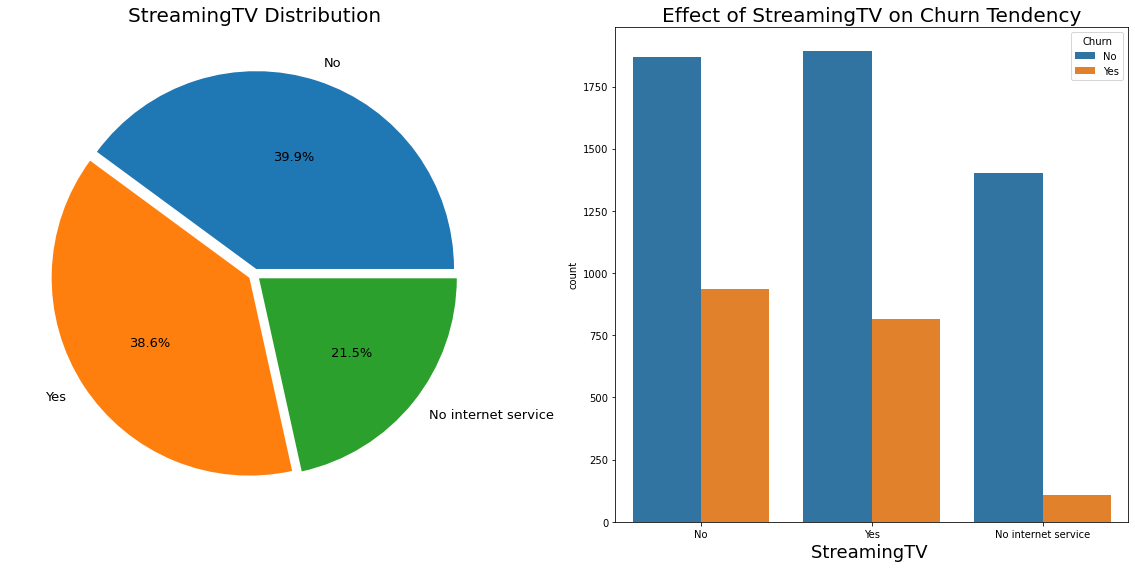

In [281]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8)) 
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',fontsize = 13, ax=ax[0])
ax[0].set_title('StreamingTV Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20)
ax[1].set_xlabel("StreamingTV ",fontsize=18)
plt.tight_layout()
plt.show()

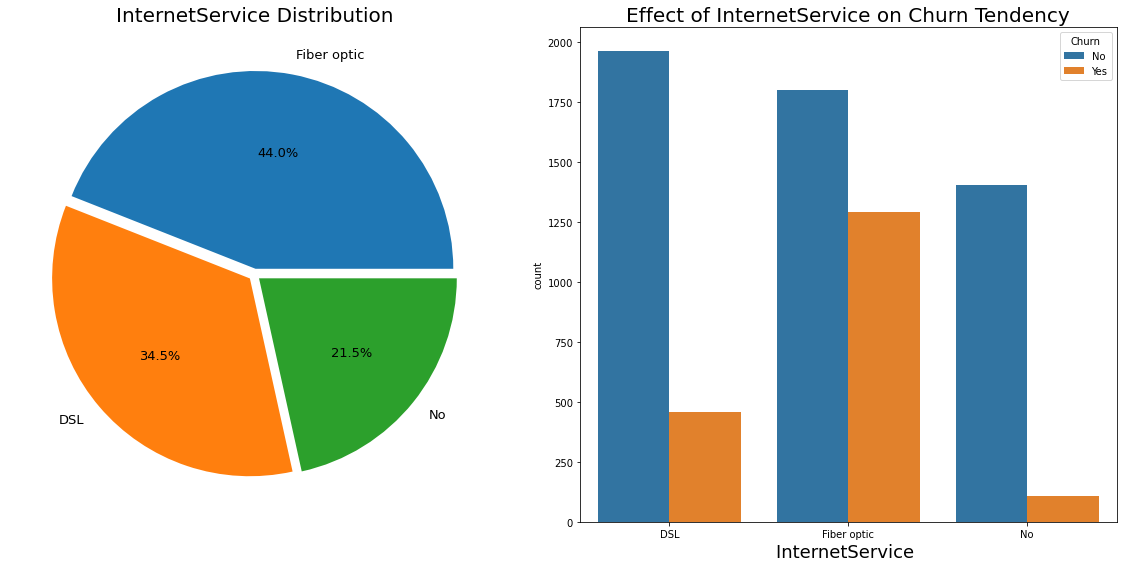

In [282]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',fontsize = 13, ax=ax[0])
ax[0].set_title('InternetService Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20)
ax[1].set_xlabel("InternetService ",fontsize=18)
plt.show()

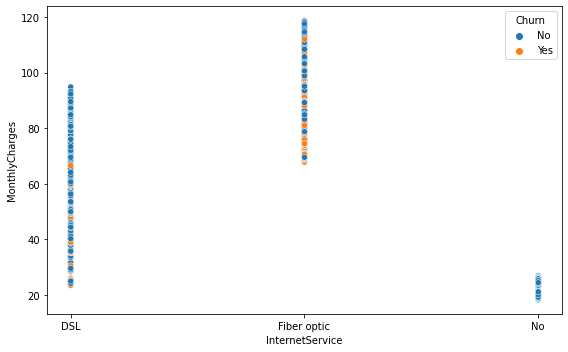

In [283]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()


44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.

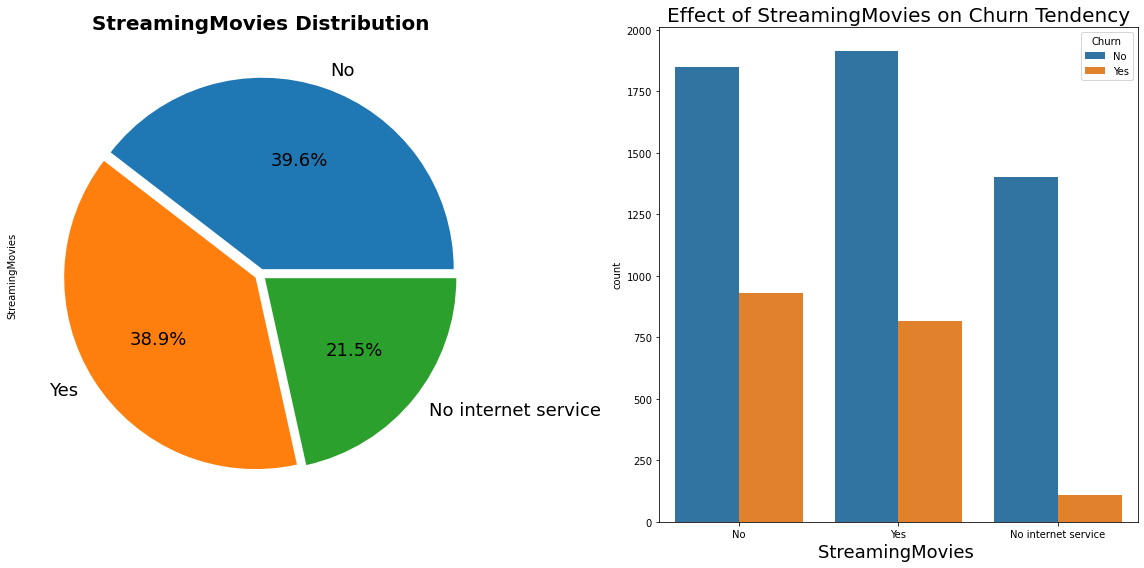

In [284]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',fontsize = 18, ax=ax[0])
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20)
ax[1].set_xlabel("StreamingMovies ",fontsize=18)
plt.tight_layout()
plt.show()

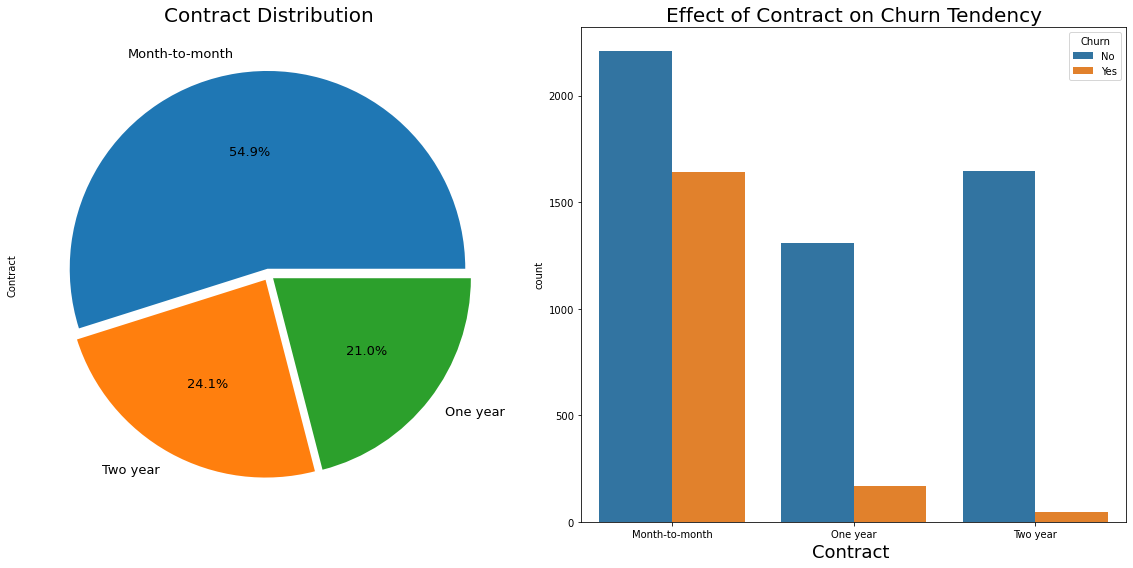

In [285]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',fontsize=13, ax=ax[0])
ax[0].set_title('Contract Distribution', fontsize=20)
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20)
ax[1].set_xlabel("Contract ",fontsize=18)
plt.tight_layout()
plt.show()

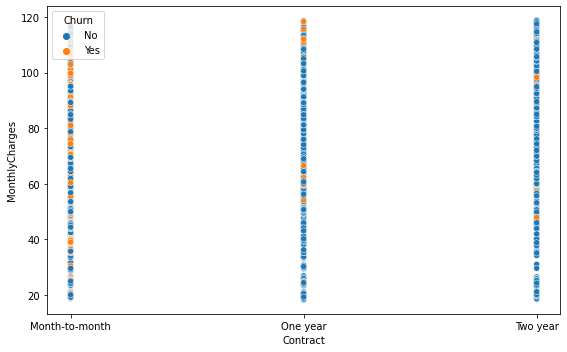

In [286]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.

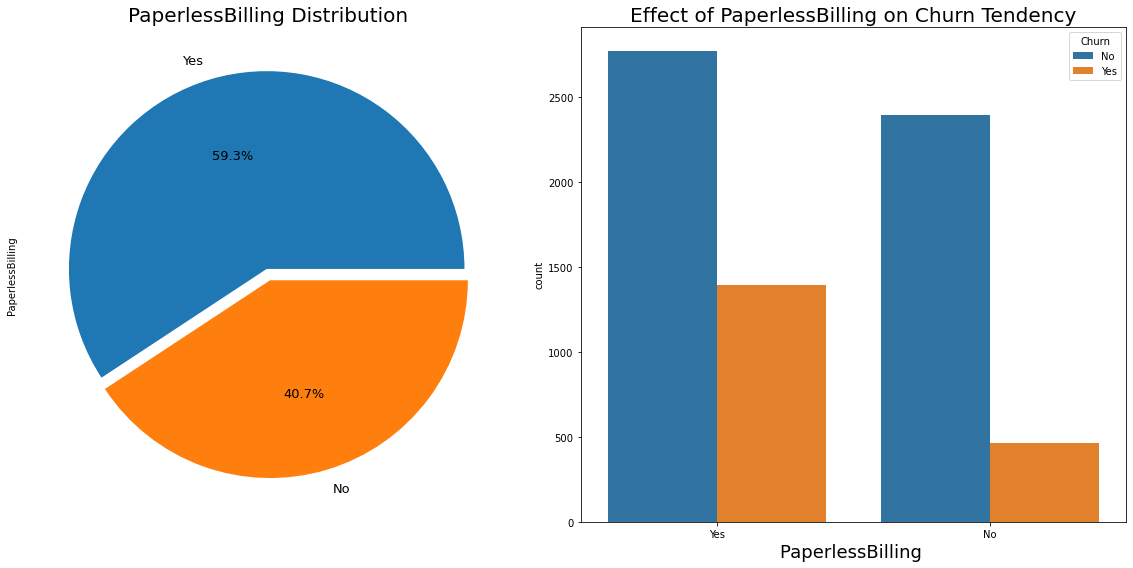

In [287]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',fontsize=13, ax=ax[0])
ax[0].set_title('PaperlessBilling Distribution', fontsize=20)
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20)
ax[1].set_xlabel("PaperlessBilling ",fontsize=18)
plt.tight_layout()
plt.show()

60% Customer perfer paperless billing.

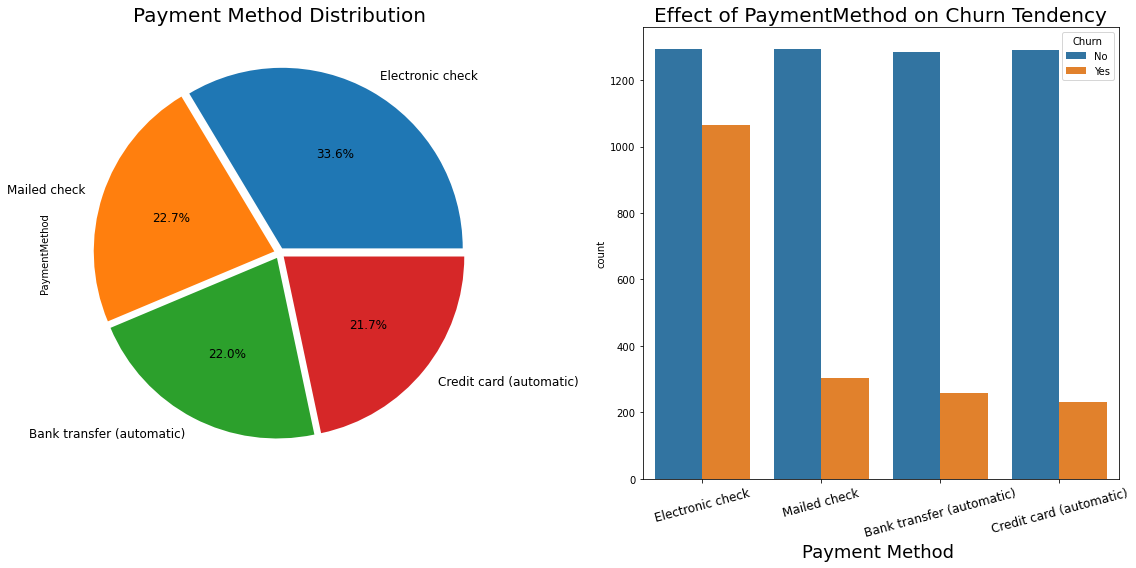

In [288]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',fontsize=12, ax=ax[0])
ax[0].set_title('Payment Method Distribution', fontsize=20)
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20)
ax[1].set_xlabel("Payment Method ",fontsize=18)
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

We can see high Attrition tendency in customer who pay by Electronic check.

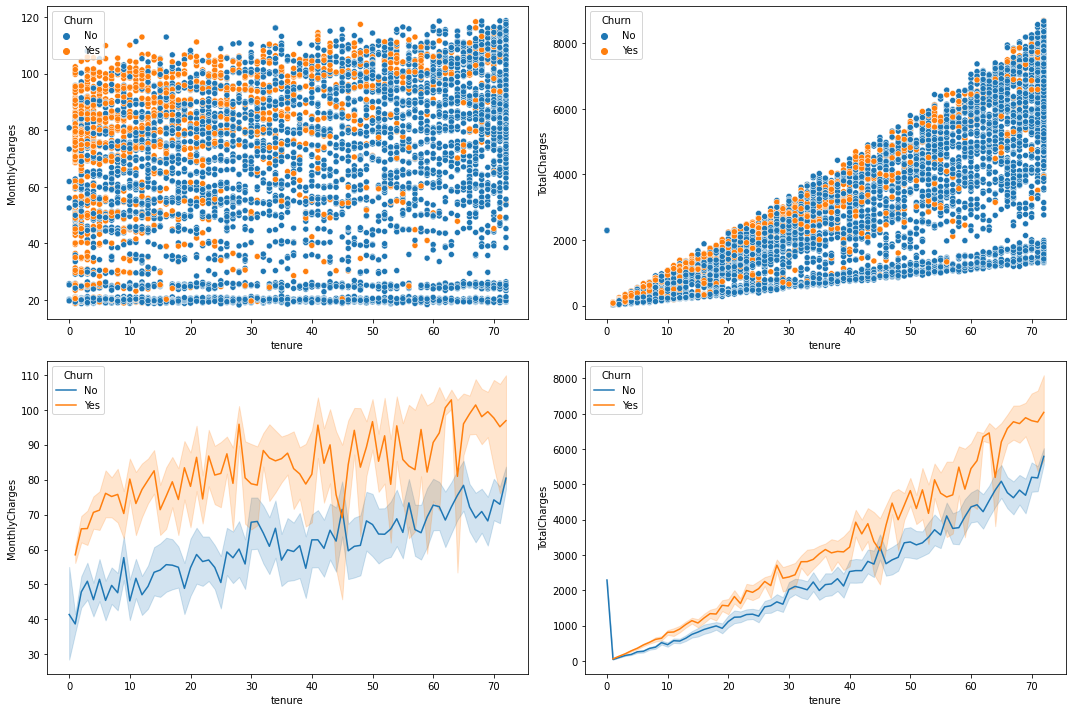

In [289]:
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

High Monthly Charges in customer who choose churn compare to rest.
Same goes with High Total Charges in customer who choose churn compare to rest.

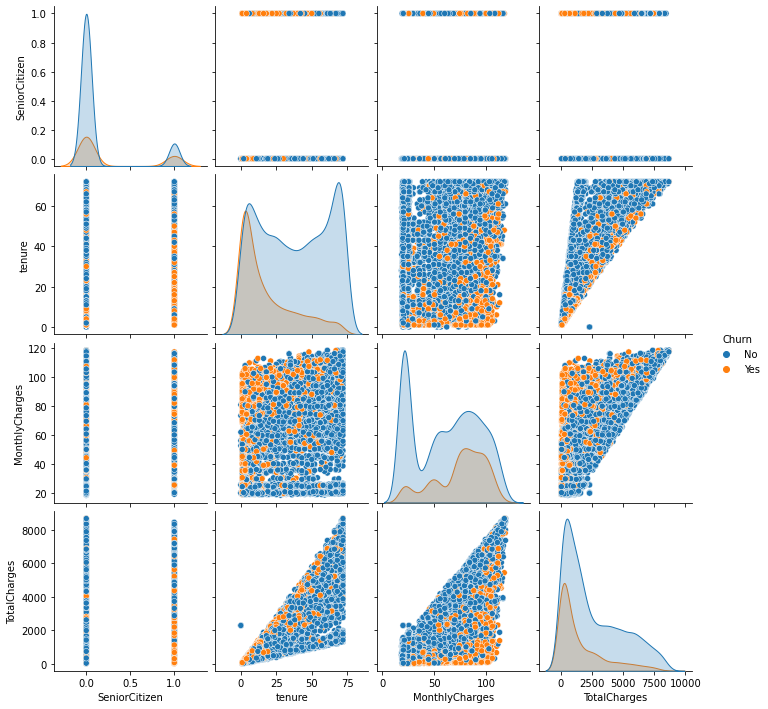

In [290]:
sns.pairplot(df,hue="Churn")
plt.show()

# Encoding categorical data

In [291]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [292]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [293]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Feature selection and Engineering

### 1. Outliers Detection and Removal

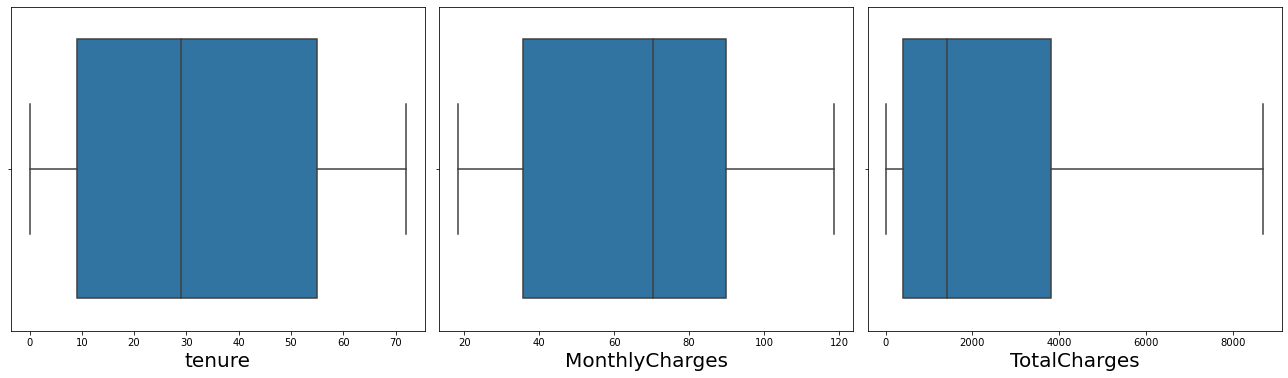

In [294]:
plt.figure(figsize=(18,10))
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

No outliers exist dataset.

#### Outliers removal using Zscore method

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int32  
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   int32  
 3   Dependents        7021 non-null   int32  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int32  
 6   MultipleLines     7021 non-null   int32  
 7   InternetService   7021 non-null   int32  
 8   OnlineSecurity    7021 non-null   int32  
 9   OnlineBackup      7021 non-null   int32  
 10  DeviceProtection  7021 non-null   int32  
 11  TechSupport       7021 non-null   int32  
 12  StreamingTV       7021 non-null   int32  
 13  StreamingMovies   7021 non-null   int32  
 14  Contract          7021 non-null   int32  
 15  PaperlessBilling  7021 non-null   int32  
 16  PaymentMethod     7021 non-null   int32  


In [296]:
df = df.astype('float')

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   float64
 1   SeniorCitizen     7021 non-null   float64
 2   Partner           7021 non-null   float64
 3   Dependents        7021 non-null   float64
 4   tenure            7021 non-null   float64
 5   PhoneService      7021 non-null   float64
 6   MultipleLines     7021 non-null   float64
 7   InternetService   7021 non-null   float64
 8   OnlineSecurity    7021 non-null   float64
 9   OnlineBackup      7021 non-null   float64
 10  DeviceProtection  7021 non-null   float64
 11  TechSupport       7021 non-null   float64
 12  StreamingTV       7021 non-null   float64
 13  StreamingMovies   7021 non-null   float64
 14  Contract          7021 non-null   float64
 15  PaperlessBilling  7021 non-null   float64
 16  PaymentMethod     7021 non-null   float64


In [298]:
def threhold(z,d):
    for i in np.arange(3,4,0.01):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,2),np.round(loss,2))) 

In [299]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 9.71%
With threshold 3.01 data loss is 9.71%
With threshold 3.02 data loss is 9.71%
With threshold 3.03 data loss is 9.71%
With threshold 3.04 data loss is 9.71%
With threshold 3.05 data loss is 0.0%
With threshold 3.06 data loss is 0.0%
With threshold 3.07 data loss is 0.0%
With threshold 3.08 data loss is 0.0%
With threshold 3.09 data loss is 0.0%
With threshold 3.1 data loss is 0.0%
With threshold 3.11 data loss is 0.0%
With threshold 3.12 data loss is 0.0%
With threshold 3.13 data loss is 0.0%
With threshold 3.14 data loss is 0.0%
With threshold 3.15 data loss is 0.0%
With threshold 3.16 data loss is 0.0%
With threshold 3.17 data loss is 0.0%
With threshold 3.18 data loss is 0.0%
With threshold 3.19 data loss is 0.0%
With threshold 3.2 data loss is 0.0%
With threshold 3.21 data loss is 0.0%
With threshold 3.22 data loss is 0.0%
With threshold 3.23 data loss is 0.0%
With threshold 3.24 data loss is 0.0%
With threshold 3.25 data loss is 0.0%
With thres

In [300]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() 

Shape of the dataframe before removing outliers:  (7021, 20)
Shape of the dataframe after removing outliers:  (6339, 20)
Percentage of data loss post outlier removal:  9.713715994872524


In [301]:
df.drop(['PhoneService'],axis=1,inplace=True)

### 2. Skewness of features

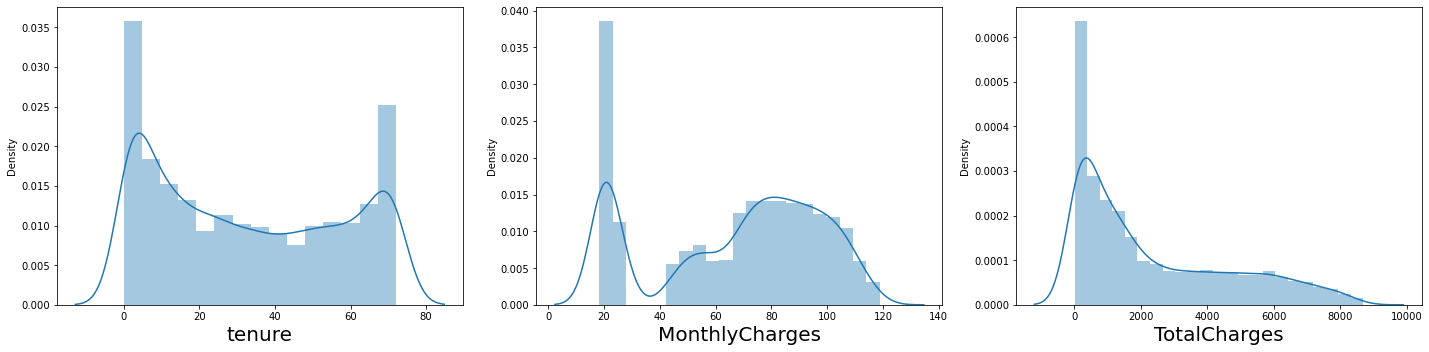

In [302]:
plt.figure(figsize=(20,5))
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

In [303]:
df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

Tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.

In [304]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

In [308]:
df['TotalCharges'].skew()

-0.7454819293951583

### 3. Corrleation

In [307]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.005846,-0.002207,0.015722,0.001891,-0.006391,0.000983,-0.016826,-0.009353,-0.003121,-0.009769,-0.005624,-0.002760,0.000674,-0.018131,0.021961,-0.011639,-0.006783,-0.011391
SeniorCitizen,-0.005846,1.000000,0.013943,-0.213486,0.017647,0.152954,-0.039479,-0.123668,-0.020710,-0.023590,-0.144694,0.028453,0.047062,-0.141107,0.155193,-0.041891,0.238426,0.111597,0.149599
Partner,-0.002207,0.013943,1.000000,0.453409,0.382932,0.147545,-0.004099,0.151348,0.154738,0.167390,0.132266,0.133353,0.127676,0.297393,-0.010458,-0.147854,0.088571,0.337926,-0.153262
Dependents,0.015722,-0.213486,0.453409,1.000000,0.159194,-0.028535,0.053701,0.146427,0.090389,0.082944,0.130166,0.048859,0.023932,0.242286,-0.106970,-0.037411,-0.131791,0.084275,-0.158628
tenure,0.001891,0.017647,0.382932,0.159194,1.000000,0.358098,-0.034932,0.326356,0.377187,0.367678,0.324457,0.282710,0.292966,0.674586,0.002370,-0.361878,0.242184,0.827354,-0.348882
MultipleLines,-0.006391,0.152954,0.147545,-0.028535,0.358098,1.000000,-0.107675,0.006752,0.125043,0.130055,0.011287,0.187307,0.193380,0.114261,0.174017,-0.183244,0.454819,0.458583,0.042438
InternetService,0.000983,-0.039479,-0.004099,0.053701,-0.034932,-0.107675,1.000000,-0.027406,0.030417,0.049829,-0.022841,0.099513,0.094169,0.115528,-0.164085,0.096674,-0.470605,-0.260767,-0.058968
OnlineSecurity,-0.016826,-0.123668,0.151348,0.146427,0.326356,0.006752,-0.027406,1.000000,0.198167,0.173275,0.283252,0.046717,0.062345,0.367667,-0.154346,-0.089597,-0.071808,0.207795,-0.289182
OnlineBackup,-0.009353,-0.020710,0.154738,0.090389,0.377187,0.125043,0.030417,0.198167,1.000000,0.195604,0.210090,0.151646,0.139587,0.286126,-0.019141,-0.126394,0.110079,0.310079,-0.201206
DeviceProtection,-0.003121,-0.023590,0.167390,0.082944,0.367678,0.130055,0.049829,0.173275,0.195604,1.000000,0.241956,0.278088,0.284397,0.342751,-0.040732,-0.132907,0.154859,0.318027,-0.176171


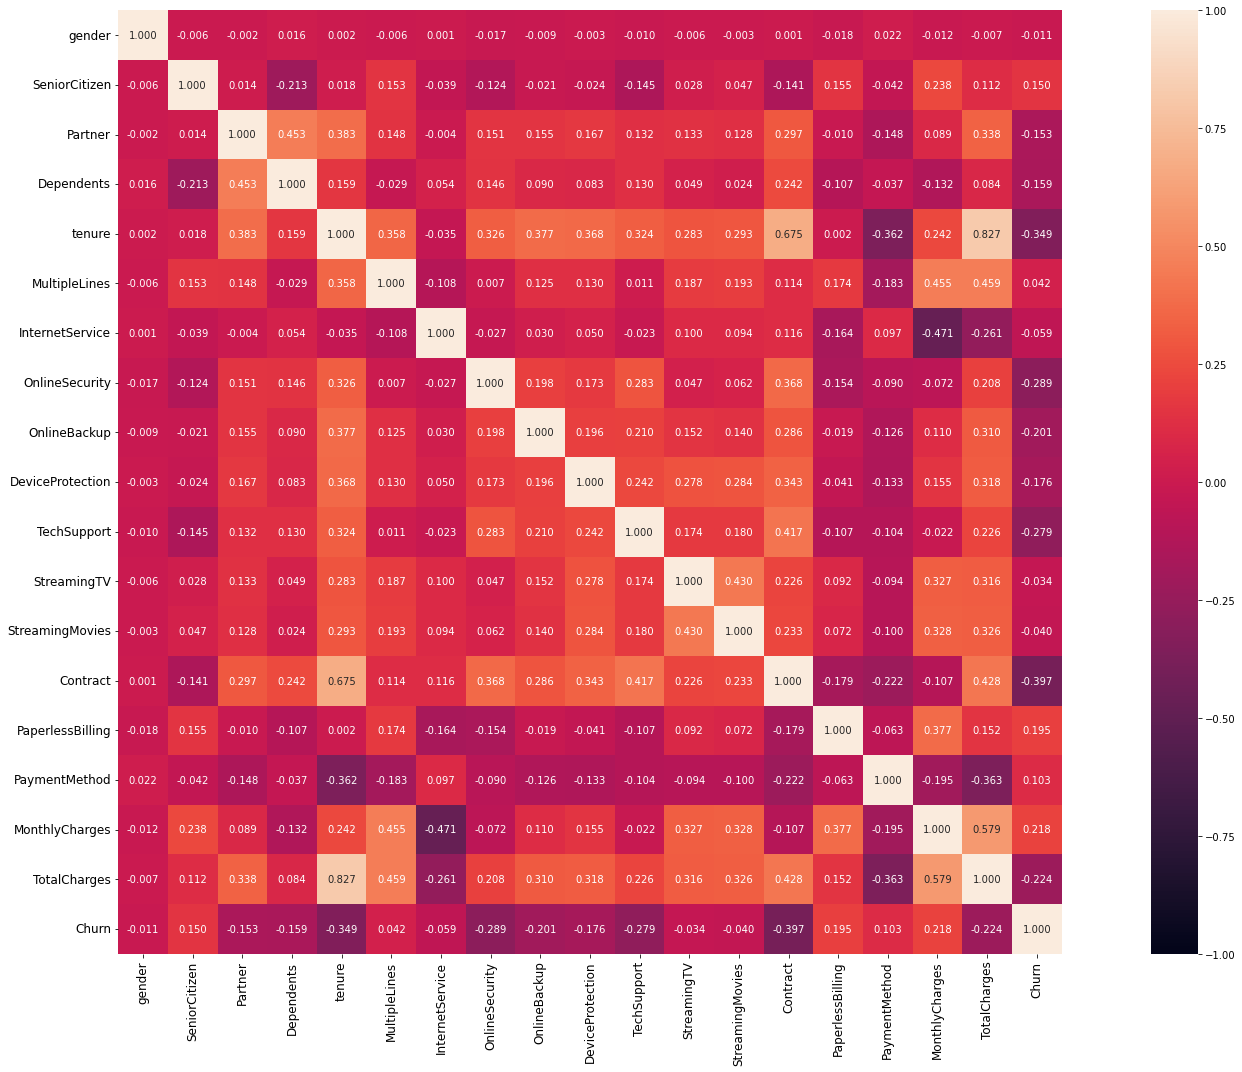

In [309]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10},)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

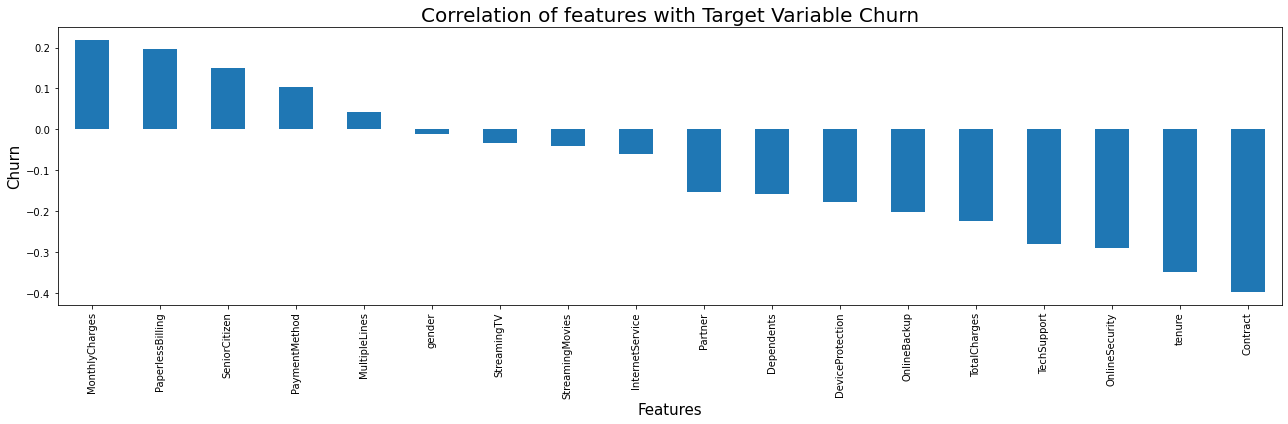

In [310]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Churn',fontsize=15)
plt.title('Correlation of features with Target Variable Churn',fontsize = 20)
plt.show()

### 4. Balanceing Imbalanced target feature

In [311]:
df.Churn.value_counts()

0.0    4652
1.0    1687
Name: Churn, dtype: int64

In [312]:
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE

In [313]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [314]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [315]:
Y.value_counts()

0.0    4652
1.0    4652
Name: Churn, dtype: int64

Successfully resolved the class imbalanced problem 

### Standard Scaling

In [316]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### 5. Checking Multicollinearity

In [317]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.003580,gender
1,1.170410,SeniorCitizen
2,1.502966,Partner
3,1.405026,Dependents
4,6.560846,tenure
5,1.456800,MultipleLines
6,1.460287,InternetService
7,1.319074,OnlineSecurity
8,1.242475,OnlineBackup
9,1.290985,DeviceProtection


### PCA

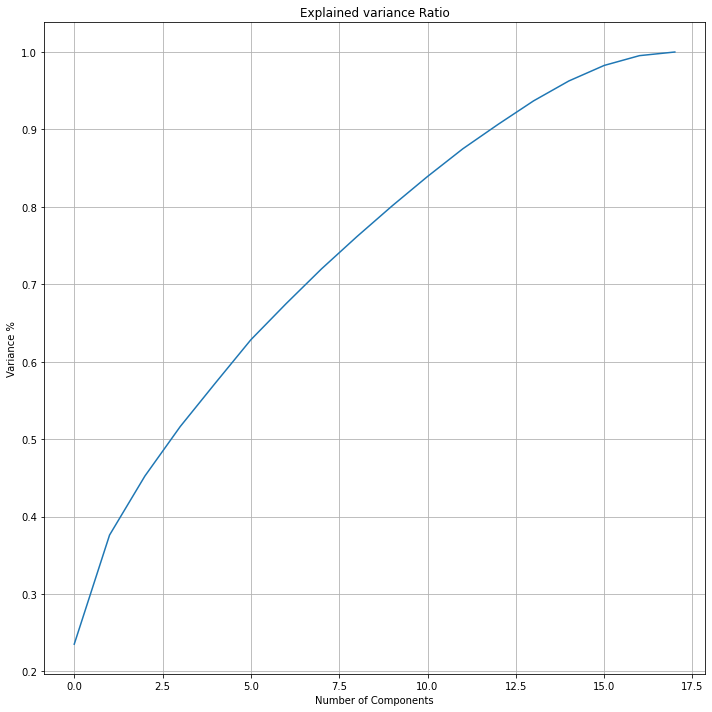

In [318]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

13 principal components attribute for 90% of variation in the data.

In [319]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [320]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

# Model Building

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Best Random state

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8103170338527673 on Random_state 205


In [323]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=205, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8103170338527673


Confusion matrix of Logistics Regression : 
 [[707 212]
 [141 801]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       919
         1.0       0.79      0.85      0.82       942

    accuracy                           0.81      1861
   macro avg       0.81      0.81      0.81      1861
weighted avg       0.81      0.81      0.81      1861



### All classification  Model

In [326]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8103170338527673


Confusion matrix : 
 [[707 212]
 [141 801]]


Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       919
         1.0       0.79      0.85      0.82       942

    accuracy                           0.81      1861
   macro avg       0.81      0.81      0.81      1861
weighted avg       0.81      0.81      0.81      1861



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8495432563138098


Confusion matrix : 
 [[765 154]
 [126 816]]


Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       919
         1.0       0.84      0.87      0.85       942

    accuracy                           0.85      1861
   macro avg       0.85      0.85      0.85      1861
weighted avg       0.85      0.85      0.85     

# CrossValidation :

In [327]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.76786674 0.76141859 0.75926921 0.77968834 0.77365591]
Mean Score : 0.7683797588300889
Std deviation : 0.007582149324449655




Cross Validation Score SVC() :

Score : [0.76679205 0.75497045 0.82160129 0.83933369 0.83763441]
Mean Score : 0.8040663766156477
Std deviation : 0.03599404250639853




Cross Validation Score GaussianNB() :

Score : [0.74476088 0.73723804 0.77324019 0.79849543 0.80483871]
Mean Score : 0.7717146521987832
Std deviation : 0.027319893608865903




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69747448 0.73240193 0.80548092 0.8146158  0.80860215]
Mean Score : 0.7717150566523953
Std deviation : 0.04774610035120788




Cross Validation Score RandomForestClassifier() :

Score : [0.76732939 0.7898979  0.84685653 0.86029017 0.8672043 ]
Mean Score : 0.8263156587104863
Std deviation : 0.040134045397153165




Cross Validation Score ExtraTreesClassifier() :

Score : [0.78183772 0.78882321 0.86512628

# Hyper Parameter Tuning

In [328]:
from sklearn.model_selection import GridSearchCV

In [329]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [331]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=10)
GCV.fit(X_train,Y_train)  

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [332]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 70}

In [333]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 70, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8667383127350886


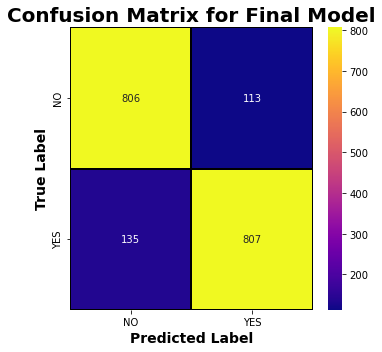

In [334]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

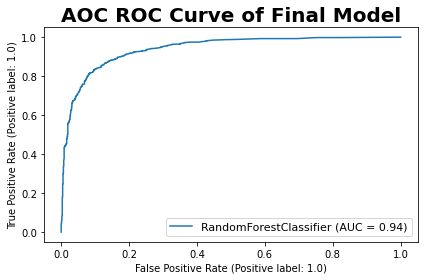

Auc Score :
 0.8668640796212997


In [335]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [336]:
import joblib
joblib.dump(Final_mod,'Customer_Churn.pkl')

['Customer_Churn.pkl']